# Fasion MNIST Classifier
__Design and Develop:__ Mobin Nesari

__Course:__ Artificial Neural Networks, Bachelor Programs

In this notebook, we tried to train a model to classify clothes in fasion MNIST dataset.

## Required Packages:

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as fun

## Enable Cuda

In [3]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"

device = torch.device(dev)

## Download dataset and divide it into train and test set

Download dataset and divide it into trainset and testset and trainloader and testloader

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))
                               ])


trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



Size and shpae of images and labels

In [5]:
data_iter = iter(trainloader)
images, labels = data_iter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Example of an image

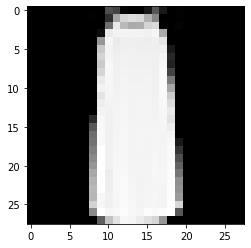

In [6]:
plt.imshow(images[31].numpy().squeeze(), cmap = 'Greys_r')

## Define basic model

In [7]:
base_model = nn.Sequential(nn.Linear(784, 256),
                           nn.ReLU(),
                           nn.Linear(256, 128),
                           nn.ReLU(),
                           nn.Linear(128, 64),
                           nn.ReLU(),
                           nn.Linear(64, 10),
                           nn.LogSoftmax(dim=1)
                           )

Define loss

In [8]:
criterion = nn.NLLLoss()

Define optimmizer

In [9]:
optimizer = optim.Adam(base_model.parameters(), lr= 0.002)

## Model run function

In [10]:
def run_model(model, optimizer, epochs):
  train_losses, test_losses = [], []

  for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      
      optimizer.zero_grad()
      
      output = model.forward(images)
      loss = criterion(output, labels)
      loss.backward()
      optimizer.step()
      
      running_loss += loss.item()
    else:
      test_loss = 0
      accuracy = 0
      
      with torch.no_grad():
        model.eval()
        
        for images, labels in testloader:
          images = images.view(images.shape[0], -1)
          log_ps = model(images)
          test_loss += criterion(log_ps, labels)
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim = 1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      
      model.train()
      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))
      
      print("Epoch: {}/{}..".format(e+1, epochs),
            "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
            "Test loss: {:.3f}..".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
  return [train_losses, test_losses]

## Test 1

In [ ]:
results = run_model(base_model, 30)

Epoch: 1/30.. Training loss: 0.515.. Test loss: 0.432.. Test Accuracy: 0.841
Epoch: 2/30.. Training loss: 0.385.. Test loss: 0.382.. Test Accuracy: 0.858
Epoch: 3/30.. Training loss: 0.350.. Test loss: 0.369.. Test Accuracy: 0.862
Epoch: 4/30.. Training loss: 0.322.. Test loss: 0.428.. Test Accuracy: 0.846
Epoch: 5/30.. Training loss: 0.304.. Test loss: 0.390.. Test Accuracy: 0.860
Epoch: 6/30.. Training loss: 0.290.. Test loss: 0.360.. Test Accuracy: 0.873
Epoch: 7/30.. Training loss: 0.279.. Test loss: 0.347.. Test Accuracy: 0.878
Epoch: 8/30.. Training loss: 0.263.. Test loss: 0.362.. Test Accuracy: 0.873
Epoch: 9/30.. Training loss: 0.258.. Test loss: 0.369.. Test Accuracy: 0.871
Epoch: 10/30.. Training loss: 0.245.. Test loss: 0.368.. Test Accuracy: 0.875
Epoch: 11/30.. Training loss: 0.242.. Test loss: 0.345.. Test Accuracy: 0.884
Epoch: 12/30.. Training loss: 0.236.. Test loss: 0.356.. Test Accuracy: 0.882
Epoch: 13/30.. Training loss: 0.222.. Test loss: 0.363.. Test Accuracy: 0

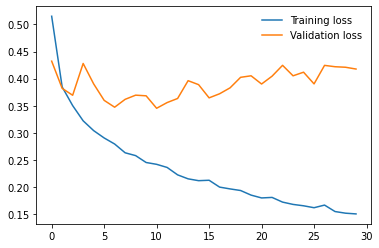

In [ ]:
plt.plot(results[0], label = "Training loss")
plt.plot(results[1], label = "Validation loss")
plt.legend(frameon = False)

As you can see, our training loss decreased a lot but validation loss increased. This means our model has been overfitted!

## Test 2

In this test I want to see depth effect in model performace

In [ ]:
depth_model_5 = nn.Sequential(nn.Linear(784, 512),
                           nn.ReLU(),
                           nn.Linear(512, 256),
                           nn.ReLU(),
                           nn.Linear(256, 128),
                           nn.ReLU(),
                           nn.Linear(128, 64),
                           nn.ReLU(),
                           nn.Linear(64, 10),
                           nn.LogSoftmax(dim=1)
                           )
optimizer_5 = optim.Adam(depth_model_5.parameters(), lr= 0.002)

In [ ]:
depth_model_6 = nn.Sequential(nn.Linear(784, 512),
                           nn.ReLU(),
                           nn.Linear(512, 256),
                           nn.ReLU(),
                           nn.Linear(256, 128),
                           nn.ReLU(),
                           nn.Linear(128, 64),
                           nn.ReLU(),
                           nn.Linear(64, 32),
                           nn.ReLU(),
                           nn.Linear(32, 10),
                           nn.LogSoftmax(dim=1)
                           )
optimizer_6 = optim.Adam(depth_model_6.parameters(), lr= 0.002)

In [ ]:
depth_model_7 = nn.Sequential(nn.Linear(784, 512),
                           nn.ReLU(),
                           nn.Linear(512, 256),
                           nn.ReLU(),
                           nn.Linear(256, 128),
                           nn.ReLU(),
                           nn.Linear(128, 64),
                           nn.ReLU(),
                           nn.Linear(64, 32),
                           nn.ReLU(),
                           nn.Linear(32, 16),
                           nn.ReLU(),
                           nn.Linear(16, 10),
                           nn.LogSoftmax(dim=1)
                           )
optimizer_7 = optim.Adam(depth_model_7.parameters(), lr= 0.002)

In [ ]:
depth_model_8 = nn.Sequential(nn.Linear(784, 1024),
                           nn.ReLU(),
                           nn.Linear(1024, 512),
                           nn.ReLU(),
                           nn.Linear(512, 256),
                           nn.ReLU(),
                           nn.Linear(256, 128),
                           nn.ReLU(),
                           nn.Linear(128, 64),
                           nn.ReLU(),
                           nn.Linear(64, 32),
                           nn.ReLU(),
                           nn.Linear(32, 16),
                           nn.ReLU(),
                           nn.Linear(16, 10),
                           nn.LogSoftmax(dim=1)
                           )
optimizer_8 = optim.Adam(depth_model_8.parameters(), lr= 0.002)

In [ ]:
trains_losses = []
test_losses = []
models = [depth_model_5, depth_model_6, depth_model_7, depth_model_8]
optimizers = [optimizer_5, optimizer_6, optimizer_7, optimizer_8]
for i in range(4):
  print("Running model", i + 5)
  results = run_model(models[i], optimizers[i], 20)
  trains_losses.append(results[0])
  test_losses.append(results[1])

Running model 5
Epoch: 1/20.. Training loss: 0.243.. Test loss: 0.377.. Test Accuracy: 0.879
Epoch: 2/20.. Training loss: 0.235.. Test loss: 0.355.. Test Accuracy: 0.880
Epoch: 3/20.. Training loss: 0.227.. Test loss: 0.358.. Test Accuracy: 0.884
Epoch: 4/20.. Training loss: 0.221.. Test loss: 0.349.. Test Accuracy: 0.885
Epoch: 5/20.. Training loss: 0.213.. Test loss: 0.386.. Test Accuracy: 0.880
Epoch: 6/20.. Training loss: 0.206.. Test loss: 0.382.. Test Accuracy: 0.883
Epoch: 7/20.. Training loss: 0.200.. Test loss: 0.401.. Test Accuracy: 0.877
Epoch: 8/20.. Training loss: 0.196.. Test loss: 0.389.. Test Accuracy: 0.880
Epoch: 9/20.. Training loss: 0.191.. Test loss: 0.384.. Test Accuracy: 0.886
Epoch: 10/20.. Training loss: 0.184.. Test loss: 0.386.. Test Accuracy: 0.885
Epoch: 11/20.. Training loss: 0.178.. Test loss: 0.416.. Test Accuracy: 0.877
Epoch: 12/20.. Training loss: 0.181.. Test loss: 0.399.. Test Accuracy: 0.881
Epoch: 13/20.. Training loss: 0.171.. Test loss: 0.404.. 

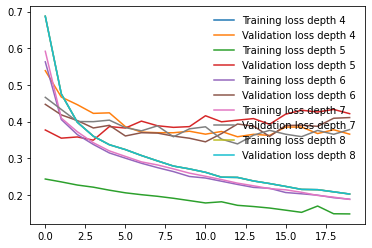

In [ ]:
plt.plot(results[0], label = "Training loss depth 4")
plt.plot(results[1], label = "Validation loss depth 4")
plt.plot(trains_losses[0], label = "Training loss depth 5")
plt.plot(test_losses[0], label = "Validation loss depth 5")
plt.plot(trains_losses[1], label = "Training loss depth 6")
plt.plot(test_losses[1], label = "Validation loss depth 6")
plt.plot(trains_losses[2], label = "Training loss depth 7")
plt.plot(test_losses[2], label = "Validation loss depth 7")
plt.plot(trains_losses[3], label = "Training loss depth 8")
plt.plot(trains_losses[3], label = "Validation loss depth 8")
plt.legend(frameon = False)

This plot shows that there is a specific depth which optimize learning curve. If we make model more depth then model will memorise dataset.

## Test 3

In [ ]:
drop_model = nn.Sequential(nn.Linear(784, 256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(256, 128),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(128, 64),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(64, 10),
                           nn.LogSoftmax(dim=1)
                           )
drop_optimizer = optim.Adam(drop_model.parameters(), lr= 0.002)

In [ ]:
drop_results = run_model(drop_model, drop_optimizer, 30)

Epoch: 1/30.. Training loss: 0.593.. Test loss: 0.456.. Test Accuracy: 0.839
Epoch: 2/30.. Training loss: 0.457.. Test loss: 0.417.. Test Accuracy: 0.845
Epoch: 3/30.. Training loss: 0.414.. Test loss: 0.424.. Test Accuracy: 0.849
Epoch: 4/30.. Training loss: 0.400.. Test loss: 0.378.. Test Accuracy: 0.864
Epoch: 5/30.. Training loss: 0.384.. Test loss: 0.390.. Test Accuracy: 0.861
Epoch: 6/30.. Training loss: 0.373.. Test loss: 0.368.. Test Accuracy: 0.868
Epoch: 7/30.. Training loss: 0.360.. Test loss: 0.373.. Test Accuracy: 0.866
Epoch: 8/30.. Training loss: 0.358.. Test loss: 0.378.. Test Accuracy: 0.861
Epoch: 9/30.. Training loss: 0.348.. Test loss: 0.377.. Test Accuracy: 0.870
Epoch: 10/30.. Training loss: 0.340.. Test loss: 0.372.. Test Accuracy: 0.871
Epoch: 11/30.. Training loss: 0.341.. Test loss: 0.355.. Test Accuracy: 0.872
Epoch: 12/30.. Training loss: 0.332.. Test loss: 0.362.. Test Accuracy: 0.872
Epoch: 13/30.. Training loss: 0.328.. Test loss: 0.349.. Test Accuracy: 0

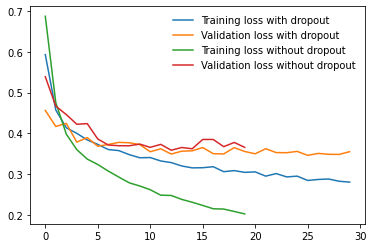

In [ ]:
plt.plot(drop_results[0], label = "Training loss with dropout")
plt.plot(drop_results[1], label = "Validation loss with dropout")
plt.plot(results[0], label = "Training loss without dropout")
plt.plot(results[1], label = "Validation loss without dropout")
plt.legend(frameon = False)

Clearly, dropout technique helped us to prevent model from memorising training dataset.

## Test 4

In this test, we will use early stoping criteria and see it's effect

Early stopper object

In [ ]:
class EarlyStopper:
  def __init__(self, patience=1, min_delta=0):
      self.patience = patience
      self.min_delta = min_delta
      self.counter = 0
      self.min_validation_loss = np.inf

  def early_stop(self, validation_loss):
      if validation_loss < self.min_validation_loss:
          self.min_validation_loss = validation_loss
          self.counter = 0
      elif validation_loss > (self.min_validation_loss + self.min_delta):
          self.counter += 1
          if self.counter >= self.patience:
              return True
      return False

Customised run_model function:

In [ ]:
def run_model_early_stop(model, optimizer, epochs):
  train_losses, test_losses = [], []

  early_stopper = EarlyStopper(3, 10)
  for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      
      optimizer.zero_grad()
      
      output = model.forward(images)
      loss = criterion(output, labels)
      loss.backward()
      optimizer.step()
      
      running_loss += loss.item()
    else:
      test_loss = 0
      accuracy = 0
      
      with torch.no_grad():
        model.eval()
        
        for images, labels in testloader:
          images = images.view(images.shape[0], -1)
          log_ps = model(images)
          test_loss += criterion(log_ps, labels)
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim = 1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      
      model.train()
      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))
      if early_stopper.early_stop(test_loss):
        print("Early stop has been triggered!")
        break

      
      print("Epoch: {}/{}..".format(e+1, epochs),
            "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
            "Test loss: {:.3f}..".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
  return [train_losses, test_losses]

In [ ]:
early_results = run_model_early_stop(base_model, optimizer, 30)

Epoch: 1/30.. Training loss: 0.507.. Test loss: 0.453.. Test Accuracy: 0.833
Epoch: 2/30.. Training loss: 0.384.. Test loss: 0.400.. Test Accuracy: 0.857
Epoch: 3/30.. Training loss: 0.344.. Test loss: 0.376.. Test Accuracy: 0.864
Epoch: 4/30.. Training loss: 0.323.. Test loss: 0.368.. Test Accuracy: 0.868
Epoch: 5/30.. Training loss: 0.306.. Test loss: 0.358.. Test Accuracy: 0.870
Epoch: 6/30.. Training loss: 0.290.. Test loss: 0.379.. Test Accuracy: 0.864
Epoch: 7/30.. Training loss: 0.277.. Test loss: 0.348.. Test Accuracy: 0.873
Epoch: 8/30.. Training loss: 0.265.. Test loss: 0.346.. Test Accuracy: 0.877
Epoch: 9/30.. Training loss: 0.255.. Test loss: 0.357.. Test Accuracy: 0.877
Epoch: 10/30.. Training loss: 0.246.. Test loss: 0.357.. Test Accuracy: 0.877
Epoch: 11/30.. Training loss: 0.236.. Test loss: 0.356.. Test Accuracy: 0.885
Epoch: 12/30.. Training loss: 0.234.. Test loss: 0.350.. Test Accuracy: 0.882
Epoch: 13/30.. Training loss: 0.222.. Test loss: 0.378.. Test Accuracy: 0

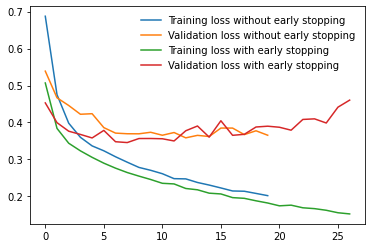

In [ ]:
plt.plot(results[0], label = "Training loss without early stopping")
plt.plot(results[1], label = "Validation loss without early stopping")
plt.plot(early_results[0], label = "Training loss with early stopping")
plt.plot(early_results[1], label = "Validation loss with early stopping")
plt.legend(frameon = False)

Early stopping helped us to prevent model from overlearning and overfitting on data and reduce number of epochs that we need to feed forward and do back-propagation 

## Test 5

In this test we will trying to do batch normalization and see the results on training.

First lets see what is batch normalization. Batch Normalization is a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling

In [ ]:
batch_model = nn.Sequential(nn.Linear(784, 256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.BatchNorm1d(256),
                           nn.Linear(256, 128),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.BatchNorm1d(128),
                           nn.Linear(128, 64),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.BatchNorm1d(64),
                           nn.Linear(64, 10),
                           nn.LogSoftmax(dim=1)
                           )
batch_optimizer = optim.Adam(batch_model.parameters(), lr= 0.002)

In [ ]:
batch_results = run_model(batch_model, batch_optimizer, 30)

Epoch: 1/30.. Training loss: 0.612.. Test loss: 0.569.. Test Accuracy: 0.820
Epoch: 2/30.. Training loss: 0.503.. Test loss: 0.619.. Test Accuracy: 0.845
Epoch: 3/30.. Training loss: 0.473.. Test loss: 0.506.. Test Accuracy: 0.847
Epoch: 4/30.. Training loss: 0.446.. Test loss: 0.457.. Test Accuracy: 0.852
Epoch: 5/30.. Training loss: 0.435.. Test loss: 0.417.. Test Accuracy: 0.858
Epoch: 6/30.. Training loss: 0.417.. Test loss: 0.463.. Test Accuracy: 0.861
Epoch: 7/30.. Training loss: 0.406.. Test loss: 0.450.. Test Accuracy: 0.860
Epoch: 8/30.. Training loss: 0.394.. Test loss: 0.472.. Test Accuracy: 0.866
Epoch: 9/30.. Training loss: 0.384.. Test loss: 0.410.. Test Accuracy: 0.865
Epoch: 10/30.. Training loss: 0.375.. Test loss: 0.515.. Test Accuracy: 0.865
Epoch: 11/30.. Training loss: 0.370.. Test loss: 0.580.. Test Accuracy: 0.865
Epoch: 12/30.. Training loss: 0.367.. Test loss: 0.388.. Test Accuracy: 0.869
Epoch: 13/30.. Training loss: 0.365.. Test loss: 0.649.. Test Accuracy: 0

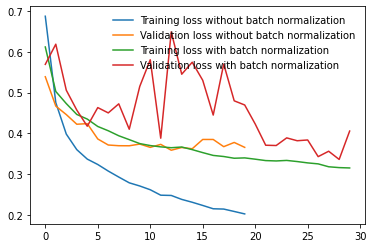

In [ ]:
plt.plot(results[0], label = "Training loss without batch normalization")
plt.plot(results[1], label = "Validation loss without batch normalization")
plt.plot(batch_results[0], label = "Training loss with batch normalization")
plt.plot(batch_results[1], label = "Validation loss with batch normalization")
plt.legend(frameon = False)

Results of using batch normalization shows that using batch normalization will help to smooth data and increase accuracy a little bit.

## Test 6

In this test, we will test $L_1$ and $L_2$ regularization

New run_model function for $L_2$ regularization:

In [11]:
def run_model_L2(model, optimizer, epochs, alpha):
  train_losses, test_losses = [], []
  for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      
      optimizer.zero_grad()
      l2_reg = None
      for i in model.named_parameters():
        if l2_reg is None:
          l2_reg = torch.sum(i[1].norm(2) ** 2)
        else:
          l2_reg += torch.sum(i[1].norm(2) ** 2)
      output = model.forward(images)
      loss = criterion(output, labels)
      loss += alpha * l2_reg
      loss.backward()
      optimizer.step()
      
      running_loss += loss.item()
    else:
      test_loss = 0
      accuracy = 0
      
      with torch.no_grad():
        model.eval()
        
        for images, labels in testloader:
          images = images.view(images.shape[0], -1)
          log_ps = model(images)
          test_loss += criterion(log_ps, labels)
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim = 1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      
      model.train()
      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))
      
      print("Epoch: {}/{}..".format(e+1, epochs),
            "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
            "Test loss: {:.3f}..".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
  return [train_losses, test_losses]

In [ ]:
def run_model_L1(model, optimizer, epochs, alpha):
  train_losses, test_losses = [], []
  for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      
      optimizer.zero_grad()
      
      l1_reg = None
      for i in model.named_parameters():
        if l1_reg is None:
          l1_reg = torch.sum(i[1].__abs__())
        else:
          l1_reg += torch.sum(i[1].__abs__())

      output = model.forward(images)
      loss = criterion(output, labels)
      loss = loss + alpha * l1_reg
      loss.backward()
      optimizer.step()
      
      running_loss += loss.item()
    else:
      test_loss = 0
      accuracy = 0
      
      with torch.no_grad():
        model.eval()
        
        for images, labels in testloader:
          images = images.view(images.shape[0], -1)
          log_ps = model(images)
          test_loss += criterion(log_ps, labels)
          
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim = 1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      
      model.train()
      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))
      
      print("Epoch: {}/{}..".format(e+1, epochs),
            "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
            "Test loss: {:.3f}..".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
  return [train_losses, test_losses]

In [ ]:
l2_results = run_model_L2(base_model, optimizer, 30, 0.0001)

Epoch: 1/30.. Training loss: 0.518.. Test loss: 0.455.. Test Accuracy: 0.833
Epoch: 2/30.. Training loss: 0.393.. Test loss: 0.394.. Test Accuracy: 0.860
Epoch: 3/30.. Training loss: 0.357.. Test loss: 0.377.. Test Accuracy: 0.863
Epoch: 4/30.. Training loss: 0.337.. Test loss: 0.406.. Test Accuracy: 0.863
Epoch: 5/30.. Training loss: 0.324.. Test loss: 0.357.. Test Accuracy: 0.872
Epoch: 6/30.. Training loss: 0.313.. Test loss: 0.386.. Test Accuracy: 0.870
Epoch: 7/30.. Training loss: 0.302.. Test loss: 0.359.. Test Accuracy: 0.873
Epoch: 8/30.. Training loss: 0.293.. Test loss: 0.367.. Test Accuracy: 0.873
Epoch: 9/30.. Training loss: 0.286.. Test loss: 0.378.. Test Accuracy: 0.878
Epoch: 10/30.. Training loss: 0.281.. Test loss: 0.377.. Test Accuracy: 0.873
Epoch: 11/30.. Training loss: 0.276.. Test loss: 0.364.. Test Accuracy: 0.875
Epoch: 12/30.. Training loss: 0.273.. Test loss: 0.348.. Test Accuracy: 0.878
Epoch: 13/30.. Training loss: 0.267.. Test loss: 0.367.. Test Accuracy: 0

In [ ]:
base_model2 = nn.Sequential(nn.Linear(784, 256),
                           nn.ReLU(),
                           nn.Linear(256, 128),
                           nn.ReLU(),
                           nn.Linear(128, 64),
                           nn.ReLU(),
                           nn.Linear(64, 10),
                           nn.LogSoftmax(dim=1)
                           )
criterion = nn.NLLLoss()
optimizer2 = optim.Adam(base_model2.parameters(), lr= 0.002)

In [ ]:
l1_results = run_model_L1(base_model2, optimizer2, 30, 0.0001)

Epoch: 1/30.. Training loss: 0.573.. Test loss: 0.438.. Test Accuracy: 0.839
Epoch: 2/30.. Training loss: 0.462.. Test loss: 0.404.. Test Accuracy: 0.857
Epoch: 3/30.. Training loss: 0.432.. Test loss: 0.381.. Test Accuracy: 0.862
Epoch: 4/30.. Training loss: 0.411.. Test loss: 0.368.. Test Accuracy: 0.867
Epoch: 5/30.. Training loss: 0.392.. Test loss: 0.386.. Test Accuracy: 0.859
Epoch: 6/30.. Training loss: 0.389.. Test loss: 0.383.. Test Accuracy: 0.861
Epoch: 7/30.. Training loss: 0.374.. Test loss: 0.369.. Test Accuracy: 0.869
Epoch: 8/30.. Training loss: 0.372.. Test loss: 0.349.. Test Accuracy: 0.871
Epoch: 9/30.. Training loss: 0.361.. Test loss: 0.361.. Test Accuracy: 0.869
Epoch: 10/30.. Training loss: 0.358.. Test loss: 0.363.. Test Accuracy: 0.876
Epoch: 11/30.. Training loss: 0.351.. Test loss: 0.353.. Test Accuracy: 0.877
Epoch: 12/30.. Training loss: 0.347.. Test loss: 0.368.. Test Accuracy: 0.868
Epoch: 13/30.. Training loss: 0.346.. Test loss: 0.351.. Test Accuracy: 0

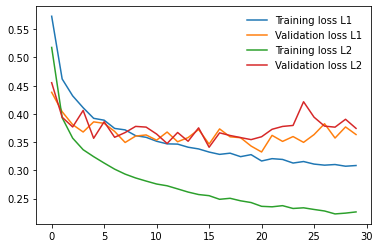

In [ ]:
plt.plot(l1_results[0], label = "Training loss L1")
plt.plot(l1_results[1], label = "Validation loss L1")
plt.plot(l2_results[0], label = "Training loss L2")
plt.plot(l2_results[1], label = "Validation loss L2")
plt.legend(frameon = False)

Now let's test $L_2$ regularization for different values for $\alpha$

In [12]:
base_model_l2 = nn.Sequential(nn.Linear(784, 256),
                           nn.ReLU(),
                           nn.Linear(256, 128),
                           nn.ReLU(),
                           nn.Linear(128, 64),
                           nn.ReLU(),
                           nn.Linear(64, 10),
                           nn.LogSoftmax(dim=1)
                           )
criterion = nn.NLLLoss()
optimizer_l2 = optim.Adam(base_model_l2.parameters(), lr= 0.002)

In [13]:
alphas = [0.001, 0.0001, 0.00001]
alpha_results = []
for alpha in alphas:
    print("Running on alpha=", alpha)
    alpha_results .append(run_model_L2(base_model_l2, optimizer_l2, 30, alpha))

Running on alpha= 0.001
Epoch: 1/30.. Training loss: 0.699.. Test loss: 0.503.. Test Accuracy: 0.812
Epoch: 2/30.. Training loss: 0.576.. Test loss: 0.449.. Test Accuracy: 0.834
Epoch: 3/30.. Training loss: 0.538.. Test loss: 0.485.. Test Accuracy: 0.821
Epoch: 4/30.. Training loss: 0.521.. Test loss: 0.436.. Test Accuracy: 0.842
Epoch: 5/30.. Training loss: 0.509.. Test loss: 0.457.. Test Accuracy: 0.833
Epoch: 6/30.. Training loss: 0.508.. Test loss: 0.413.. Test Accuracy: 0.856
Epoch: 7/30.. Training loss: 0.503.. Test loss: 0.414.. Test Accuracy: 0.848
Epoch: 8/30.. Training loss: 0.492.. Test loss: 0.436.. Test Accuracy: 0.840
Epoch: 9/30.. Training loss: 0.493.. Test loss: 0.392.. Test Accuracy: 0.858
Epoch: 10/30.. Training loss: 0.489.. Test loss: 0.452.. Test Accuracy: 0.838
Epoch: 11/30.. Training loss: 0.487.. Test loss: 0.418.. Test Accuracy: 0.849
Epoch: 12/30.. Training loss: 0.483.. Test loss: 0.406.. Test Accuracy: 0.852
Epoch: 13/30.. Training loss: 0.483.. Test loss: 

Plotting train loss for these alphas

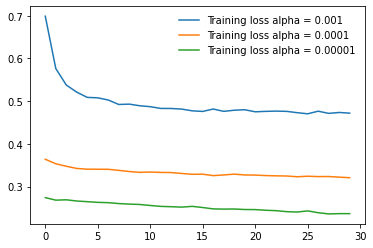

In [14]:
plt.plot(alpha_results[0][0], label = "Training loss alpha = 0.001")
plt.plot(alpha_results[1][0], label = "Training loss alpha = 0.0001")
plt.plot(alpha_results[2][0], label = "Training loss alpha = 0.00001")
plt.legend(frameon = False)


Plotting test loss for these alphas

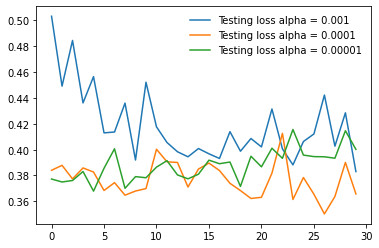

In [15]:
plt.plot(alpha_results[0][1], label = "Testing loss alpha = 0.001")
plt.plot(alpha_results[1][1], label = "Testing loss alpha = 0.0001")
plt.plot(alpha_results[2][1], label = "Testing loss alpha = 0.00001")
plt.legend(frameon = False)
